In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,precision_score,recall_score,f1_score

In [2]:
#Data Generation

In [3]:
CustomerID=[f'CustID-{i}' for i in range(1,5001)]
Age=[np.random.randint(20,60) for i in range(5000)]
Gender=[np.random.choice(["M","F"]) for i in range(5000)]
ContractType=np.random.choice(['Month-to-month', 'One year', 'Two year'], 5000, p=[0.6, 0.25, 0.15])
InternetService=np.random.choice(['DSL', 'Fiber optic', 'No'], 5000, p=[0.3, 0.5, 0.2])
TechSupport=np.where(InternetService == 'No', 'No', np.random.choice(['Yes', 'No'], 5000, p=[0.35, 0.65]))
Tenure=np.random.randint(1,60,5000)
PaperlessBilling=np.random.choice(['Yes', 'No'], 5000, p=[0.7, 0.3])
PaymentMethod=np.random.choice(['Electronic check', 'Mail check', 'Bank transfer','Credit card','Debit Card'],5000)
MonthlyCharges=[np.random.uniform(20,30) if InternetService[i] == "No" else np.random.uniform(60,90) for i in range(5000)]
TotalCharges=[MonthlyCharges[i]*Tenure[i] for i in range(5000)]
Churn=np.random.choice(["Yes","No"],5000,p=[0.8,0.2])

In [4]:
data=pd.DataFrame({"CustomerID":CustomerID,'Age':Age,'Gender':Gender,'ContractType':ContractType,'InternetService':InternetService,'TechSupport':TechSupport,"Tenure":Tenure,'PaperlessBilling':PaperlessBilling,'PaymentMethod':PaymentMethod,
              'MonthlyCharges':MonthlyCharges,'TotalCharges':TotalCharges,'Churn':Churn
})

In [5]:
data

CustomerID  Age Gender    ContractType InternetService TechSupport  \
0        CustID-1   29      M  Month-to-month     Fiber optic         Yes   
1        CustID-2   48      F  Month-to-month             DSL         Yes   
2        CustID-3   26      M        Two year              No          No   
3        CustID-4   54      F        Two year     Fiber optic          No   
4        CustID-5   22      F  Month-to-month             DSL          No   
...           ...  ...    ...             ...             ...         ...   
4995  CustID-4996   48      M  Month-to-month             DSL          No   
4996  CustID-4997   46      M        Two year              No          No   
4997  CustID-4998   34      M  Month-to-month              No          No   
4998  CustID-4999   46      M        One year     Fiber optic          No   
4999  CustID-5000   22      F  Month-to-month     Fiber optic          No   

      Tenure PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  \
0         40              Yes       Credit card       87.065923   3482.636927   
1          1              Yes       Credit card       86.241269     86.241269   
2         52               No        Mail check       22.310179   1160.129331   
3          5               No  Electronic check       65.693841    328.469204   
4         23               No  Electronic check       89.202014   2051.646315   
...      ...              ...               ...             ...           ...   
4995      48              Yes     Bank transfer       72.725479   3490.822999   
4996       5               No        Debit Card       21.606572    108.032860   
4997      41              Yes     Bank transfer       26.073427   1069.010524   
4998      58              Yes  Electronic check       69.280796   4018.286188   
4999      48               No       Credit card       85.975606   4126.829087   

     Churn  
0      Yes  
1      Yes  
2      Yes  
3      Yes  
4       No  
...    ...  
4995    No  
4996   Yes  
4997   Yes  
4998   Yes  
4999   Yes  

[5000 rows x 12 columns]

In [6]:
average_monthly_charges = [data.TotalCharges[i] / data.Tenure[i] for i in range(5000)]

In [7]:
data['average_monthly_charges']=average_monthly_charges 

In [8]:
data['average_monthly_charges']

0       87.065923
1       86.241269
2       22.310179
3       65.693841
4       89.202014
          ...    
4995    72.725479
4996    21.606572
4997    26.073427
4998    69.280796
4999    85.975606
Name: average_monthly_charges, Length: 5000, dtype: float64

In [9]:
customer_lifetime_value=[data['MonthlyCharges'][i] *data['Tenure'][i] for i in range(5000) ]

In [10]:
data['customer_lifetime_value']=customer_lifetime_value

In [11]:
data['customer_lifetime_value']

0       3482.636927
1         86.241269
2       1160.129331
3        328.469204
4       2051.646315
           ...     
4995    3490.822999
4996     108.032860
4997    1069.010524
4998    4018.286188
4999    4126.829087
Name: customer_lifetime_value, Length: 5000, dtype: float64

In [12]:
#EXPLORATORY DATA ANALYSIS

In [13]:
data.columns

Index(['CustomerID', 'Age', 'Gender', 'ContractType', 'InternetService',
       'TechSupport', 'Tenure', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'average_monthly_charges',
       'customer_lifetime_value'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               5000 non-null   object 
 1   Age                      5000 non-null   int64  
 2   Gender                   5000 non-null   object 
 3   ContractType             5000 non-null   object 
 4   InternetService          5000 non-null   object 
 5   TechSupport              5000 non-null   object 
 6   Tenure                   5000 non-null   int32  
 7   PaperlessBilling         5000 non-null   object 
 8   PaymentMethod            5000 non-null   object 
 9   MonthlyCharges           5000 non-null   float64
 10  TotalCharges             5000 non-null   float64
 11  Churn                    5000 non-null   object 
 12  average_monthly_charges  5000 non-null   float64
 13  customer_lifetime_value  5000 non-null   float64
dtypes: float64(4), int32(1),

In [15]:
data.describe()

Age       Tenure  MonthlyCharges  TotalCharges  \
count  5000.000000  5000.000000     5000.000000   5000.000000   
mean     39.372400    29.862000       65.039217   1948.000469   
std      11.452526    17.046626       21.399377   1333.609111   
min      20.000000     1.000000       20.012906     20.116157   
25%      29.000000    15.000000       61.861166    783.389910   
50%      40.000000    30.000000       71.312992   1690.720848   
75%      49.000000    44.000000       80.320875   3050.053291   
max      59.000000    59.000000       89.999904   5276.319696   

       average_monthly_charges  customer_lifetime_value  
count              5000.000000              5000.000000  
mean                 65.039217              1948.000469  
std                  21.399377              1333.609111  
min                  20.012906                20.116157  
25%                  61.861166               783.389910  
50%                  71.312992              1690.720848  
75%                  80.320875              3050.053291  
max                  89.999904              5276.319696

In [16]:
data.isna()

CustomerID    Age  Gender  ContractType  InternetService  TechSupport  \
0          False  False   False         False            False        False   
1          False  False   False         False            False        False   
2          False  False   False         False            False        False   
3          False  False   False         False            False        False   
4          False  False   False         False            False        False   
...          ...    ...     ...           ...              ...          ...   
4995       False  False   False         False            False        False   
4996       False  False   False         False            False        False   
4997       False  False   False         False            False        False   
4998       False  False   False         False            False        False   
4999       False  False   False         False            False        False   

      Tenure  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  \
0      False             False          False           False         False   
1      False             False          False           False         False   
2      False             False          False           False         False   
3      False             False          False           False         False   
4      False             False          False           False         False   
...      ...               ...            ...             ...           ...   
4995   False             False          False           False         False   
4996   False             False          False           False         False   
4997   False             False          False           False         False   
4998   False             False          False           False         False   
4999   False             False          False           False         False   

      Churn  average_monthly_charges  customer_lifetime_value  
0     False                    False                    False  
1     False                    False                    False  
2     False                    False                    False  
3     False                    False                    False  
4     False                    False                    False  
...     ...                      ...                      ...  
4995  False                    False                    False  
4996  False                    False                    False  
4997  False                    False                    False  
4998  False                    False                    False  
4999  False                    False                    False  

[5000 rows x 14 columns]

In [17]:
data.isna().sum()

CustomerID                 0
Age                        0
Gender                     0
ContractType               0
InternetService            0
TechSupport                0
Tenure                     0
PaperlessBilling           0
PaymentMethod              0
MonthlyCharges             0
TotalCharges               0
Churn                      0
average_monthly_charges    0
customer_lifetime_value    0
dtype: int64

In [18]:
for i in data.columns:
    print('unique values in ',i)
    print(data[f'{i}'].unique())

unique values in  CustomerID
['CustID-1' 'CustID-2' 'CustID-3' ... 'CustID-4998' 'CustID-4999'
 'CustID-5000']
unique values in  Age
[29 48 26 54 22 32 23 40 28 56 35 38 41 46 51 50 53 36 20 33 47 58 42 30
 43 25 31 52 21 59 55 44 24 39 57 49 34 45 27 37]
unique values in  Gender
['M' 'F']
unique values in  ContractType
['Month-to-month' 'Two year' 'One year']
unique values in  InternetService
['Fiber optic' 'DSL' 'No']
unique values in  TechSupport
['Yes' 'No']
unique values in  Tenure
[40  1 52  5 23 19  3 10 38 29 14  9 35 11 56 12  4 13 48 25 33 27 50  7
 44 58 39 36  8 46 20 15 32 26 24 18  6 51 45 37 34 57 31 47 21 59 54 42
 28 53 43 17  2 41 16 30 22 49 55]
unique values in  PaperlessBilling
['Yes' 'No']
unique values in  PaymentMethod
['Credit card' 'Mail check' 'Electronic check' 'Debit Card'
 'Bank transfer']
unique values in  MonthlyCharges
[87.06592319 86.24126919 22.31017944 ... 26.0734274  69.28079635
 85.97560598]
unique values in  TotalCharges
[3482.63692743   86.241269

In [19]:
data.dtypes

CustomerID                  object
Age                          int64
Gender                      object
ContractType                object
InternetService             object
TechSupport                 object
Tenure                       int32
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges               float64
Churn                       object
average_monthly_charges    float64
customer_lifetime_value    float64
dtype: object

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

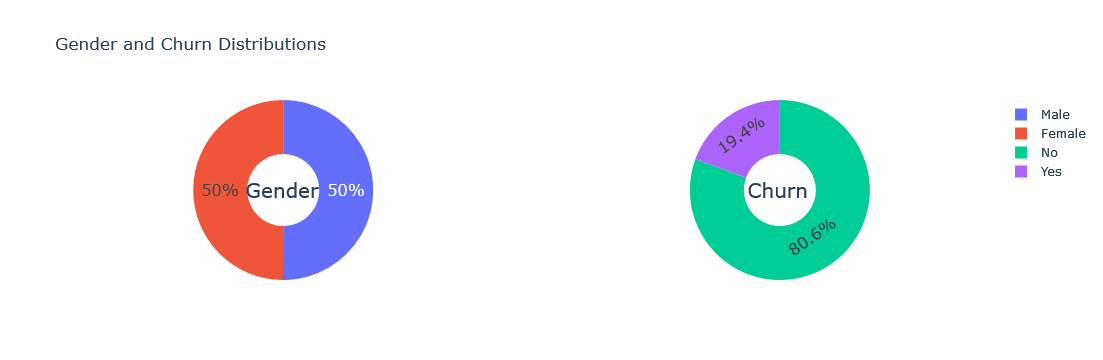

In [20]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=data['Gender'].value_counts(), name="Gender"),1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=data['Churn'].value_counts(), name="Churn"),1, 2)
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)
fig.update_layout(
    title_text="Gender and Churn Distributions",
    annotations=[dict(text='Gender', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.81, y=0.5, font_size=20, showarrow=False)])
fig.show()

<IPython.core.display.Javascript object>

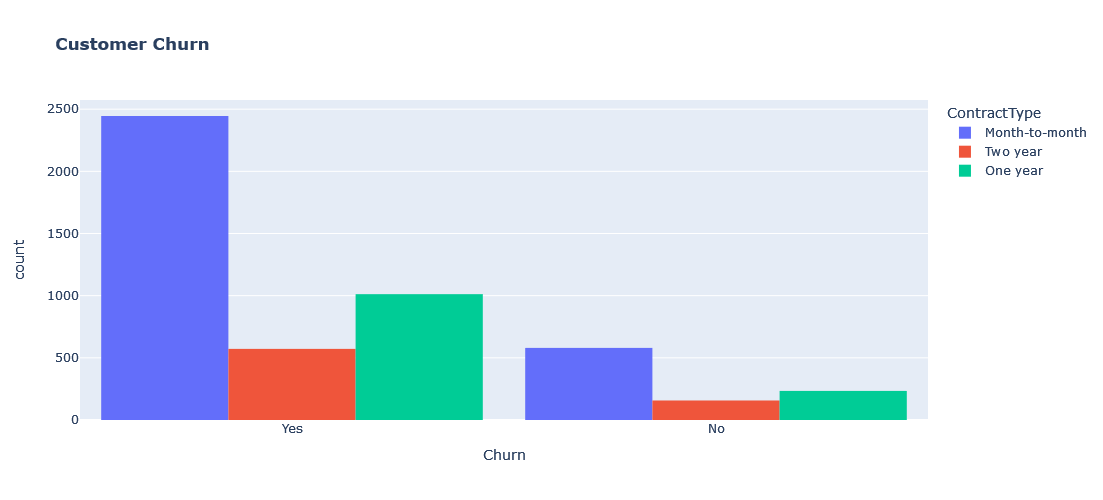

In [21]:
fig = px.histogram(data, x="Churn", color="ContractType", barmode="group", title="<b>Customer Churn<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

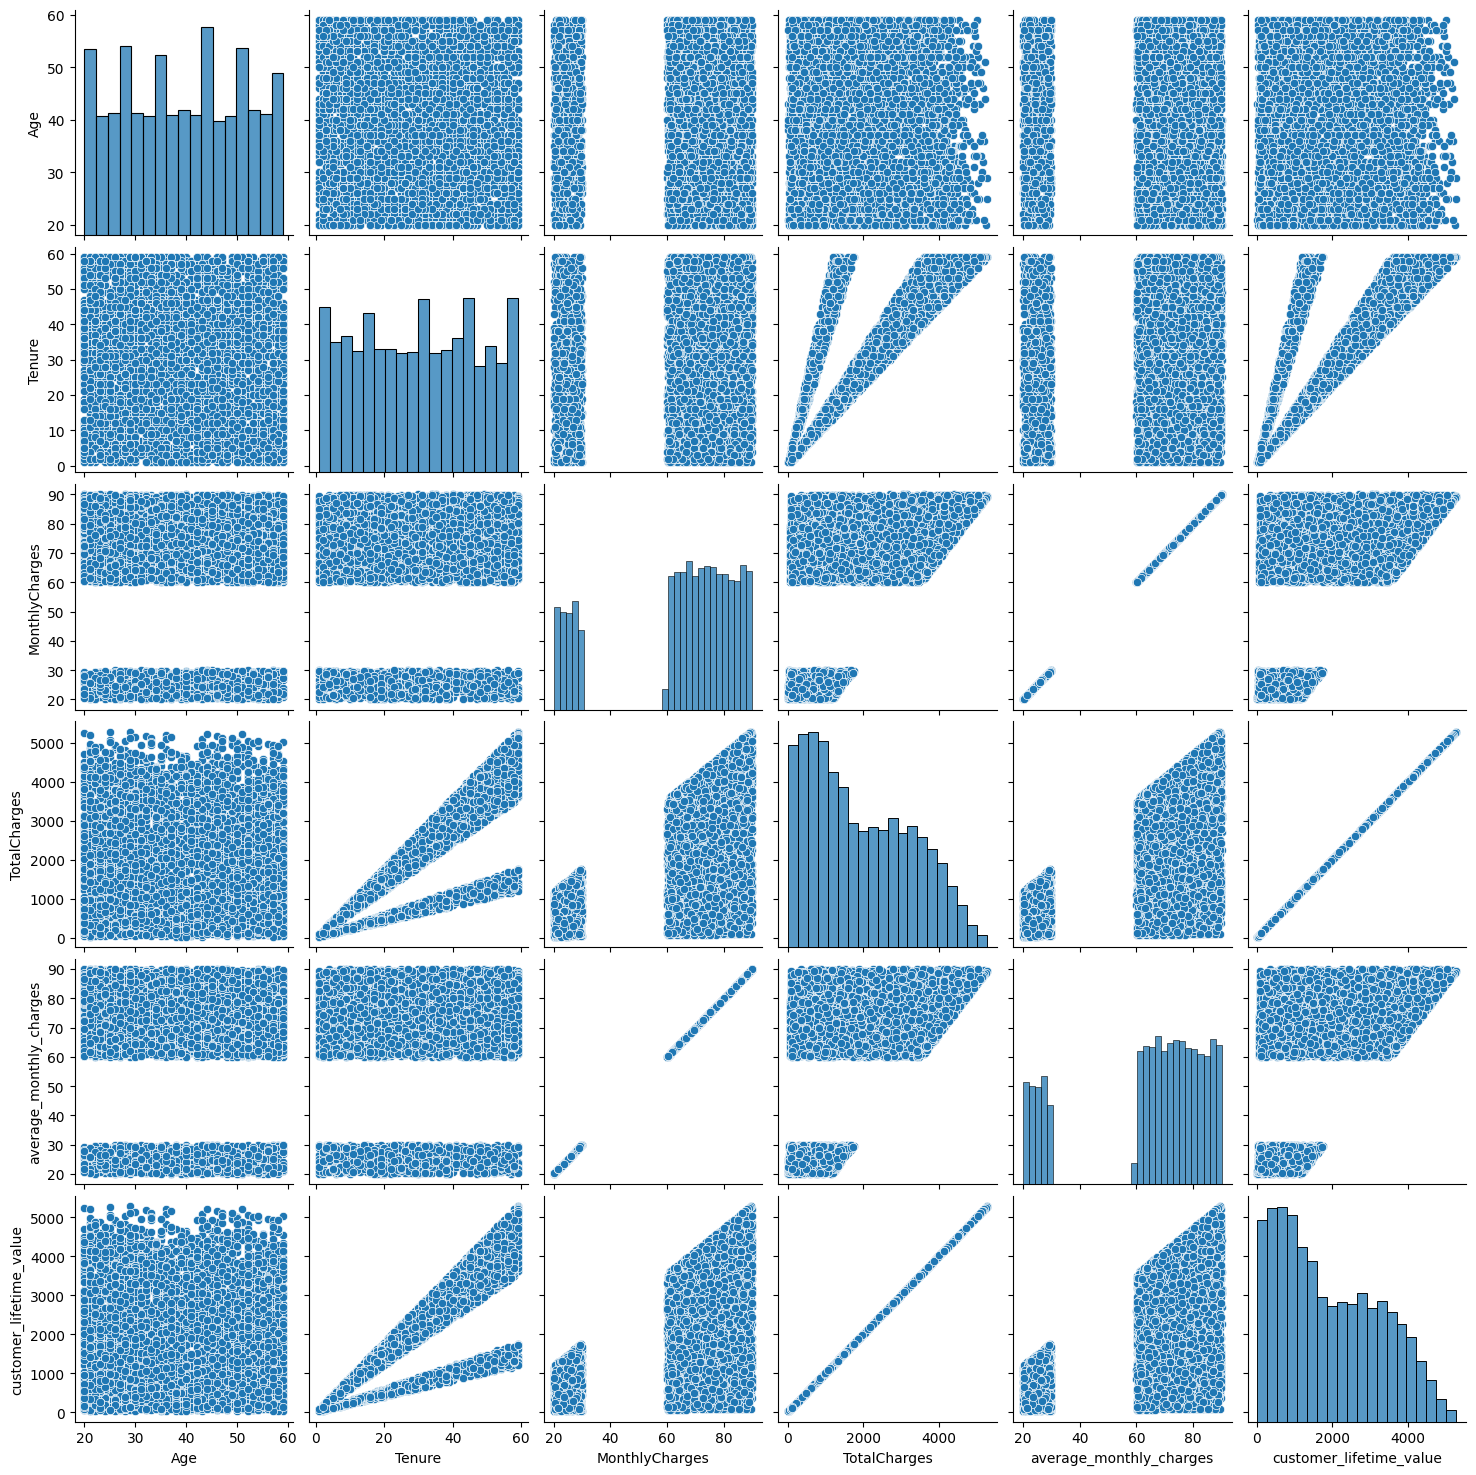

In [22]:
sns.pairplot(data)

<Figure size 6000x6000 with 0 Axes>

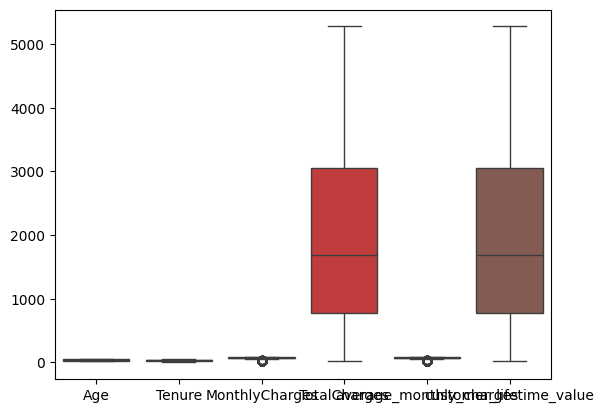

<Figure size 6000x6000 with 0 Axes>

In [23]:
sns.boxplot(data)
plt.figure(figsize=(60,60))

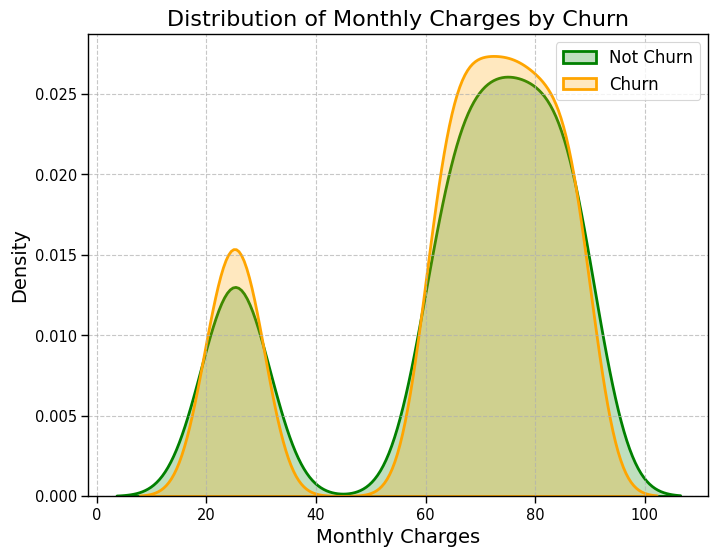

In [24]:
# Set the context for the plot
sns.set_context("paper", font_scale=1.2)
# Create the plot
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No')],
                 color="green", shade=True, linewidth=2)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes')],
                 ax=ax, color="orange", shade=True, linewidth=2)
# Add legend, labels, and title
ax.legend(["Not Churn", "Churn"], loc='upper right', fontsize=12)
ax.set_ylabel('Density', fontsize=14)
ax.set_xlabel('Monthly Charges', fontsize=14)
ax.set_title('Distribution of Monthly Charges by Churn', fontsize=16)
# Add grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)
# Show the plot
plt.show()


In [25]:
categorical_columns= [features for features in data.columns if data[features].dtype == 'O']
for col in categorical_columns:
    print(f"categorical data distributions for",col)
    freq_counts = data[col].value_counts()
    percentage = data[col].value_counts(normalize=True) * 100
    print(pd.DataFrame({'Count': freq_counts, 'Percentage (%)': percentage}))
    print("\n")


categorical data distributions for CustomerID
             Count  Percentage (%)
CustomerID                        
CustID-1         1            0.02
CustID-3331      1            0.02
CustID-3338      1            0.02
CustID-3337      1            0.02
CustID-3336      1            0.02
...            ...             ...
CustID-1667      1            0.02
CustID-1666      1            0.02
CustID-1665      1            0.02
CustID-1664      1            0.02
CustID-5000      1            0.02

[5000 rows x 2 columns]


categorical data distributions for Gender
        Count  Percentage (%)
Gender                       
F        2502           50.04
M        2498           49.96


categorical data distributions for ContractType
                Count  Percentage (%)
ContractType                         
Month-to-month   3025           60.50
One year         1246           24.92
Two year          729           14.58


categorical data distributions for InternetService
                 

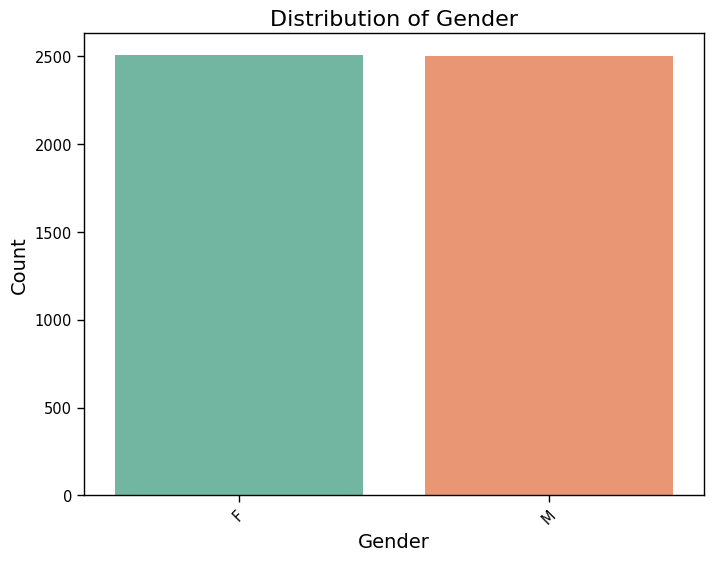

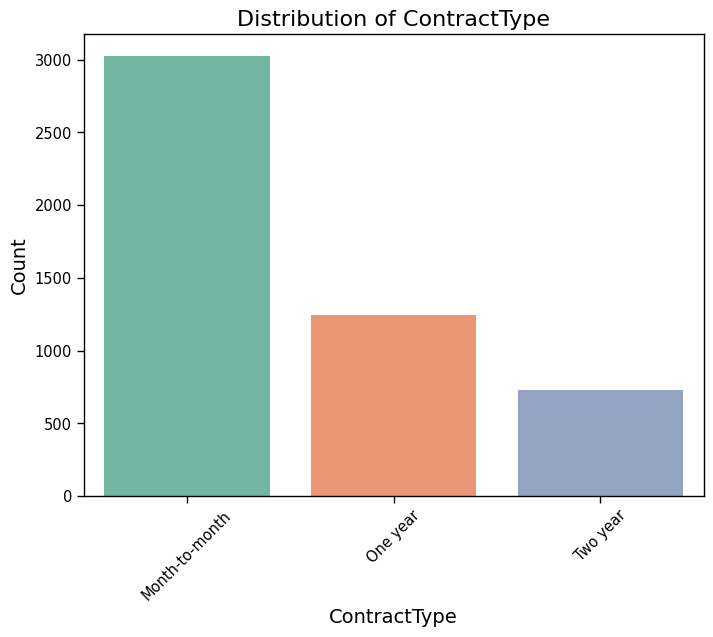

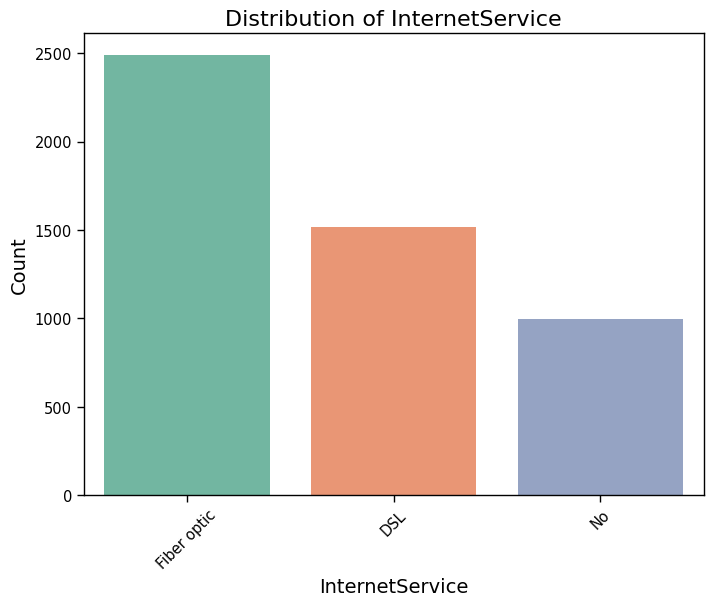

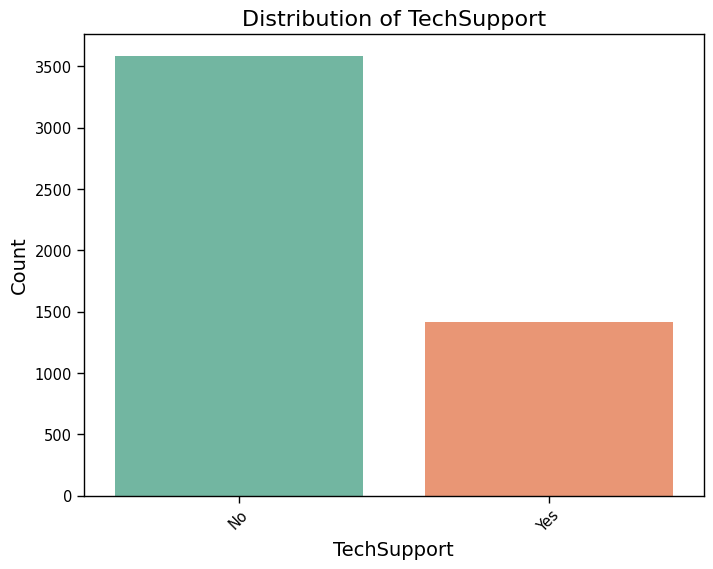

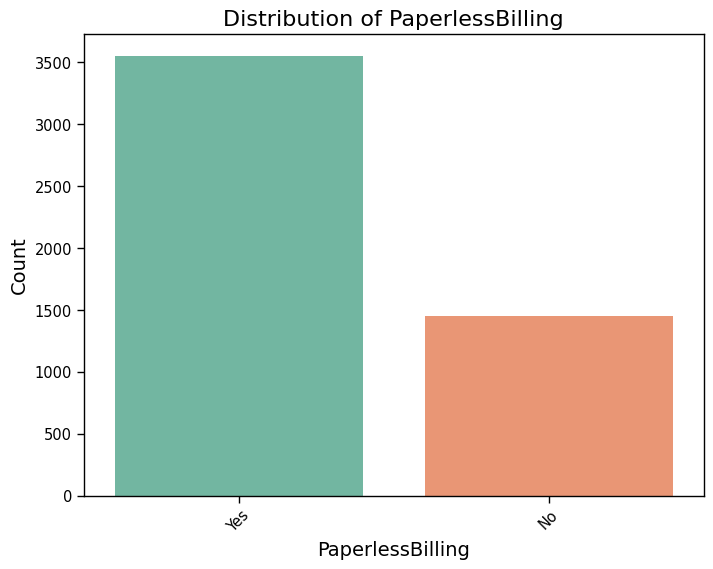

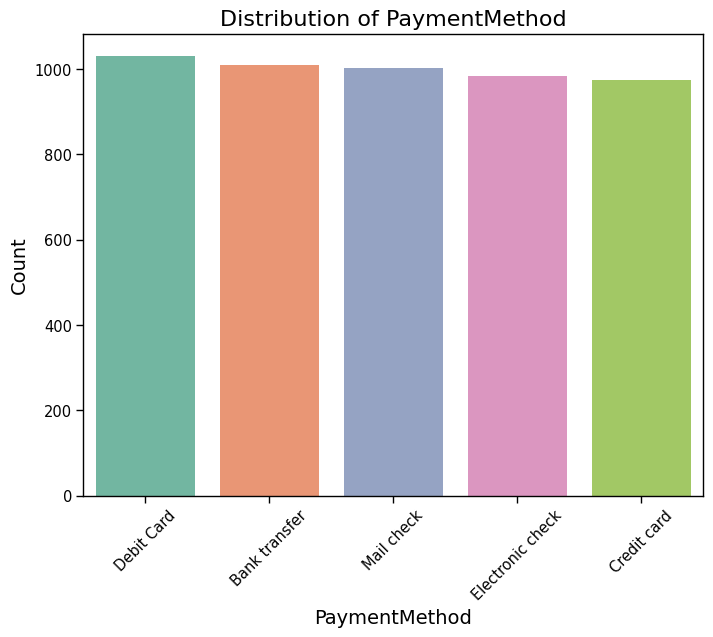

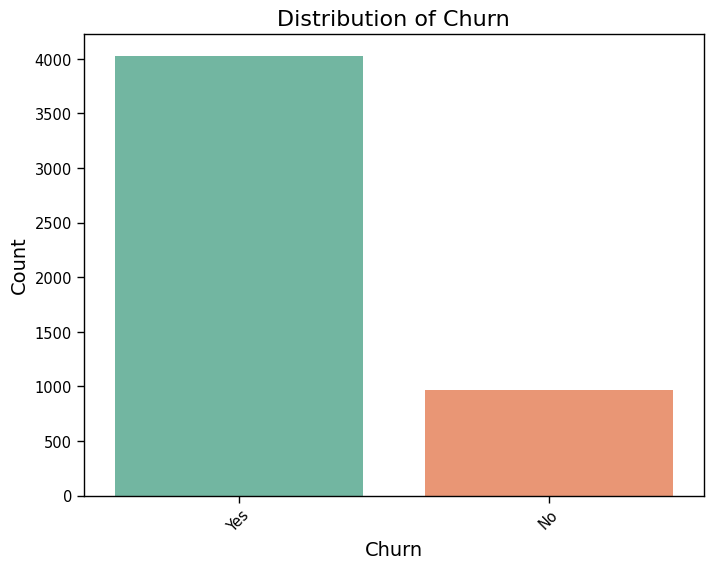

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot categorical data distributions
def plot_categorical_distribution(df, col, title):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)
    plt.title(f'Distribution of {title}', fontsize=16)
    plt.xlabel(title, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

# Plotting distributions for each categorical feature
for col in categorical_columns[1:]:
    plot_categorical_distribution(data, col, col)


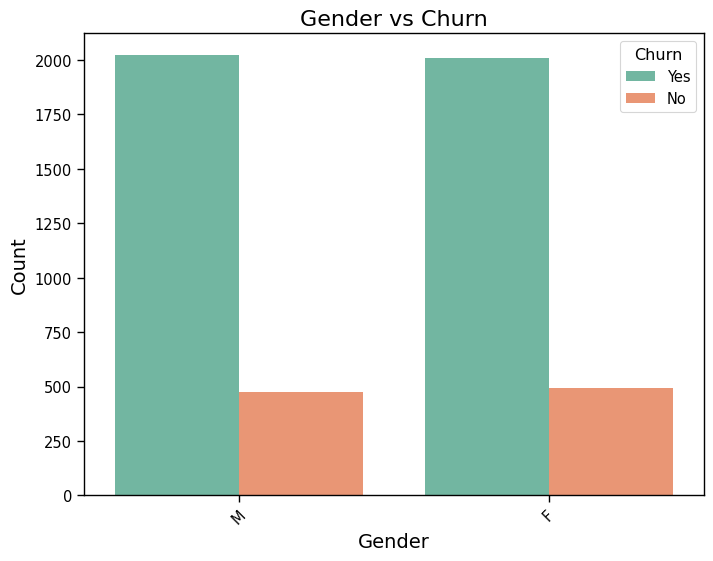

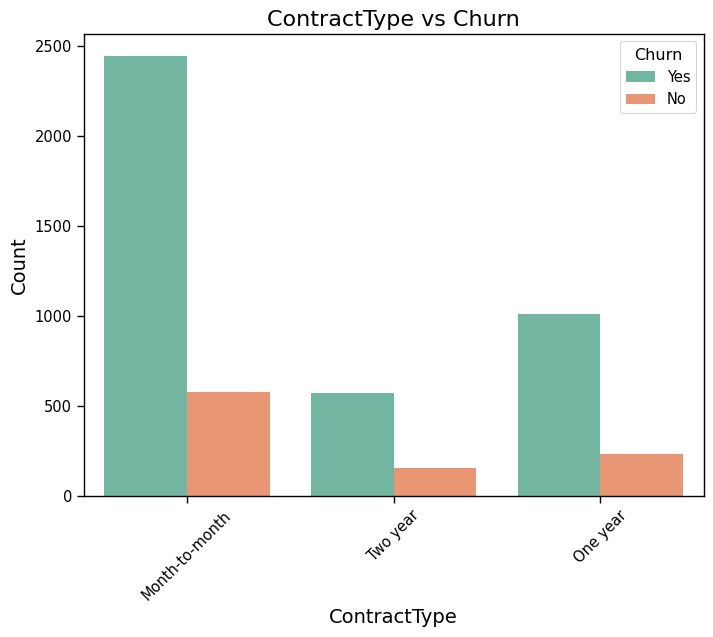

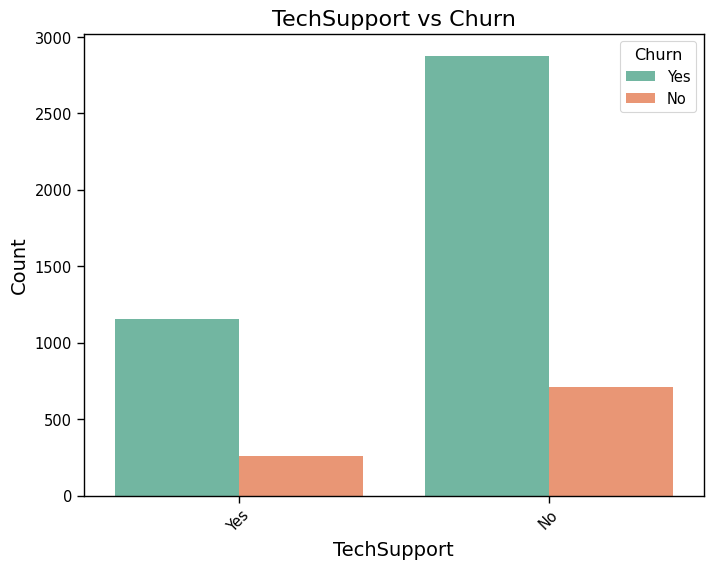

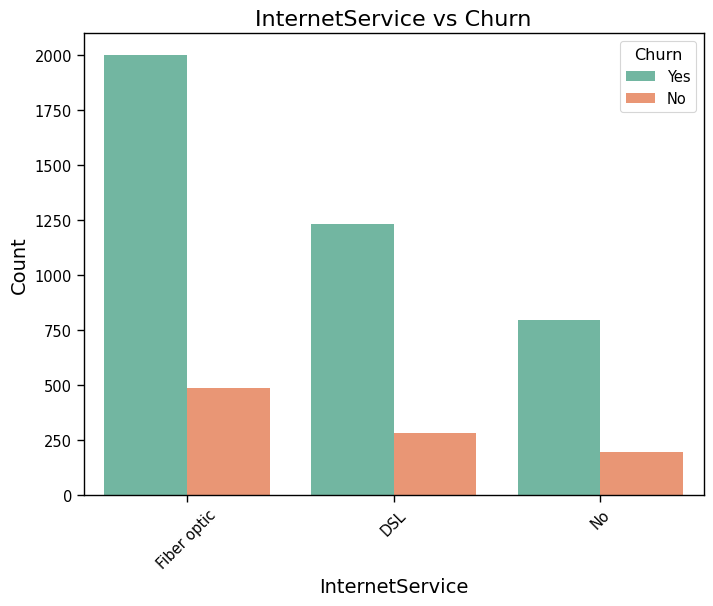

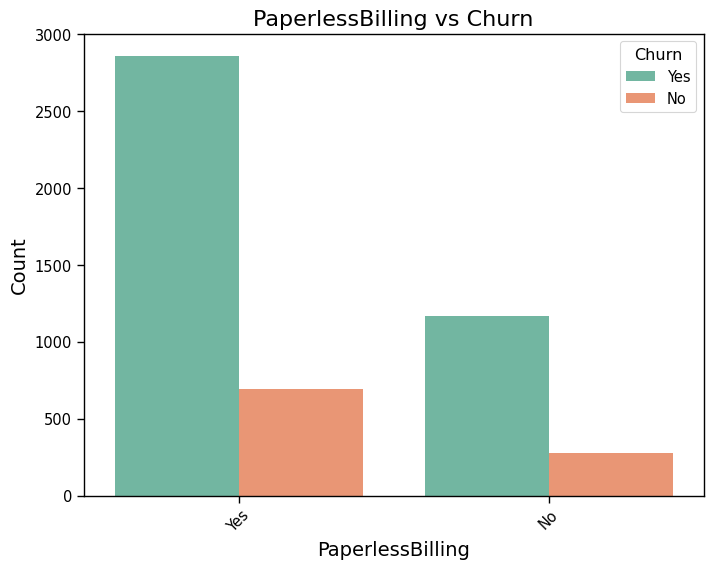

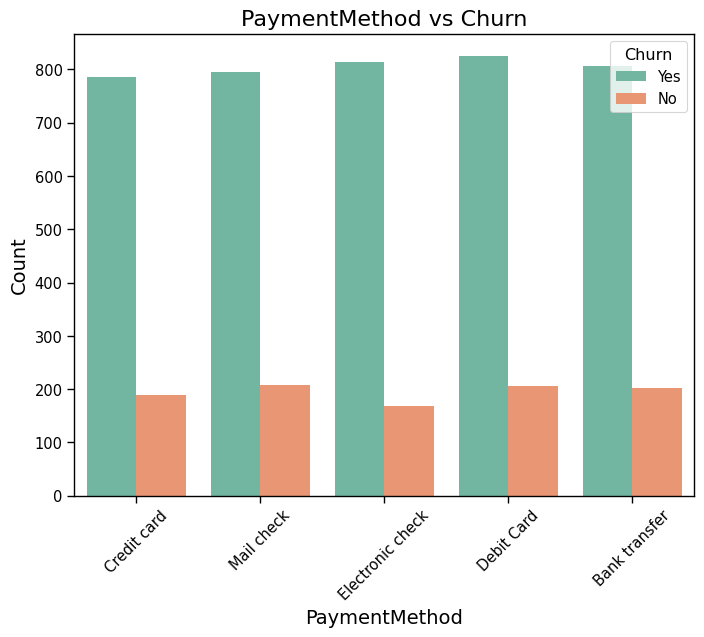

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot categorical features against Churn
def plot_categorical_vs_churn(df, col):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'{col} vs Churn', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Churn')
    plt.show()

# List of categorical columns
categorical_columns = ['Gender', 'ContractType', 'TechSupport', 
                       'InternetService', 'PaperlessBilling', 
                       'PaymentMethod']

# Plot categorical features vs Churn
for col in categorical_columns:
    plot_categorical_vs_churn(data, col)


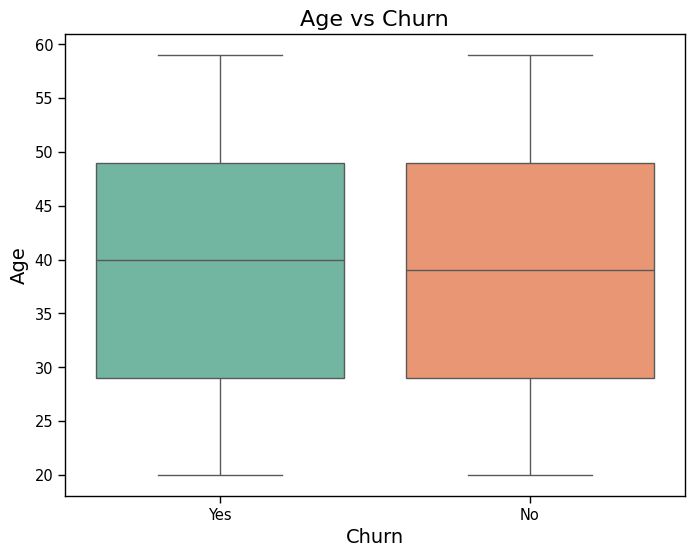

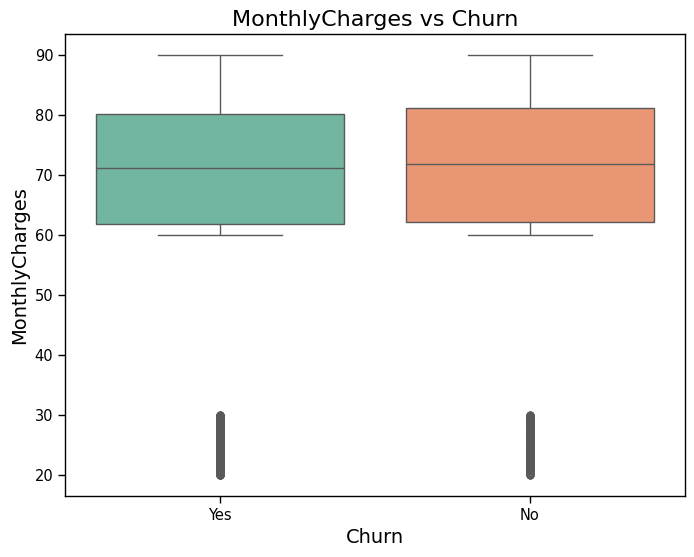

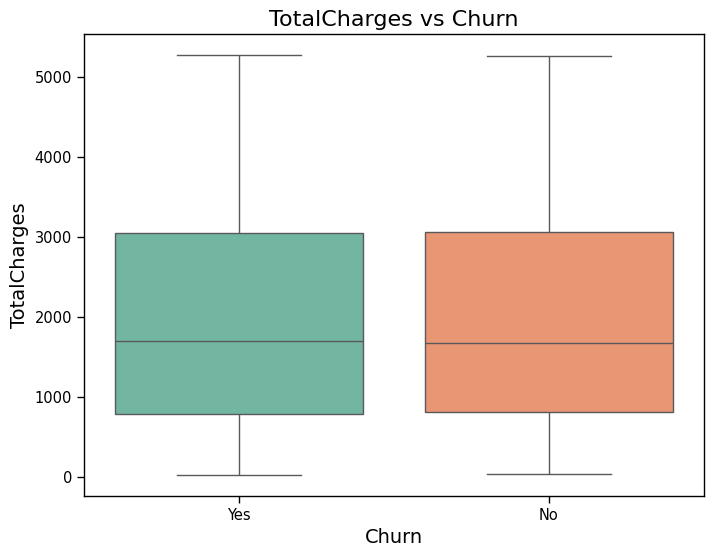

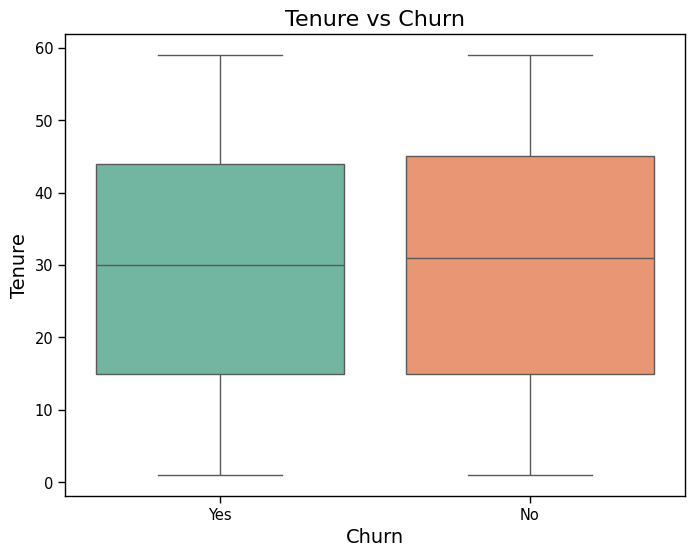

In [28]:
# Function to plot numerical features against Churn using box plots
def plot_numerical_vs_churn_box(df, col):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Churn', y=col, palette='Set2')
    plt.title(f'{col} vs Churn', fontsize=16)
    plt.xlabel('Churn', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.show()

# List of numerical columns
numerical_columns = ['Age', 'MonthlyCharges', 'TotalCharges', 'Tenure']

# Plot numerical features vs Churn
for col in numerical_columns:
    plot_numerical_vs_churn_box(data, col)


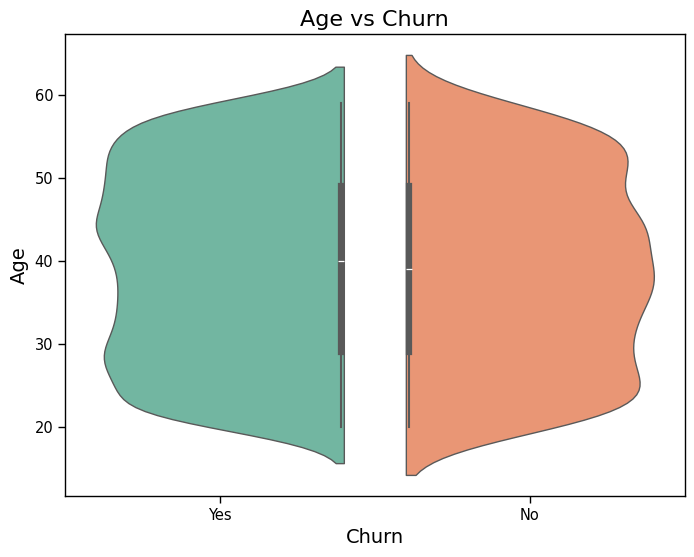

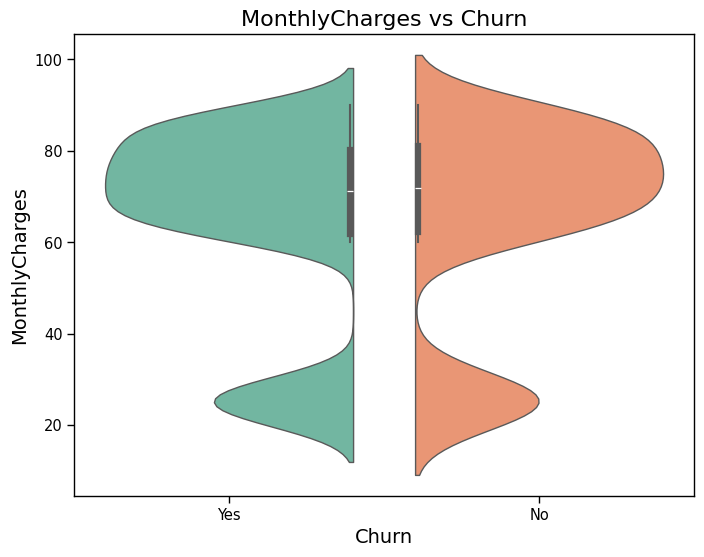

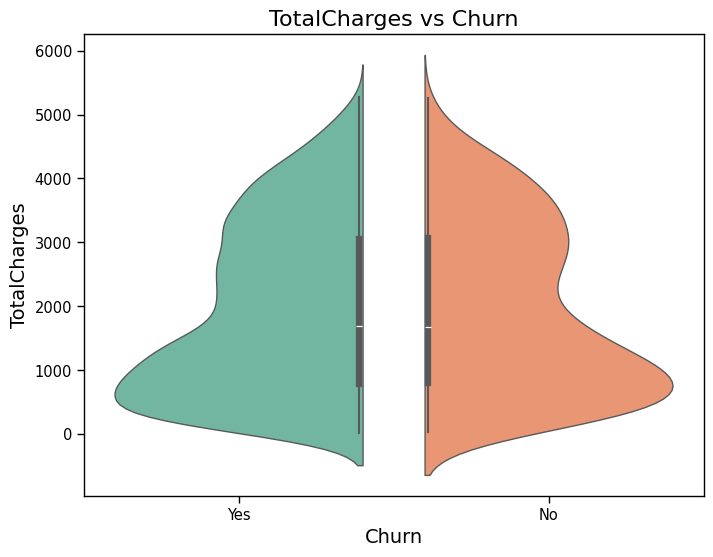

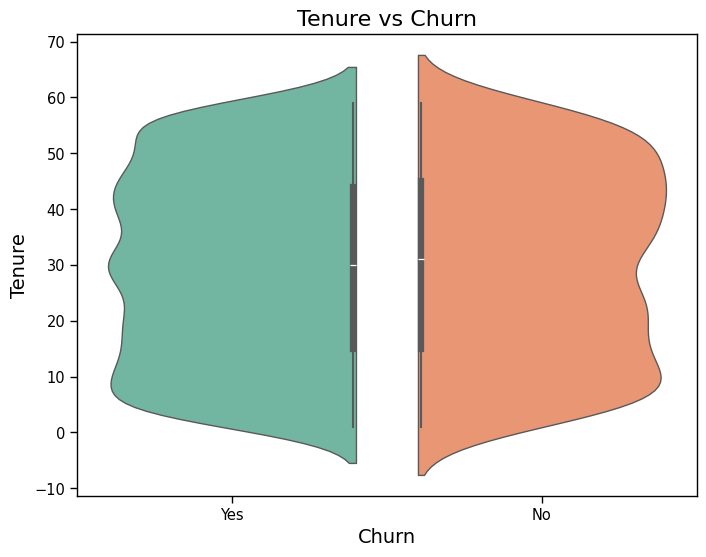

In [29]:
# Function to plot numerical features against Churn using violin plots
def plot_numerical_vs_churn_violin(df, col):
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df, x='Churn', y=col, palette='Set2', split=True)
    plt.title(f'{col} vs Churn', fontsize=16)
    plt.xlabel('Churn', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.show()

# Plot numerical features vs Churn
for col in numerical_columns:
    plot_numerical_vs_churn_violin(data, col)


In [30]:
numerical_columns=[features for features in data.columns if data[features].dtype != 'O']

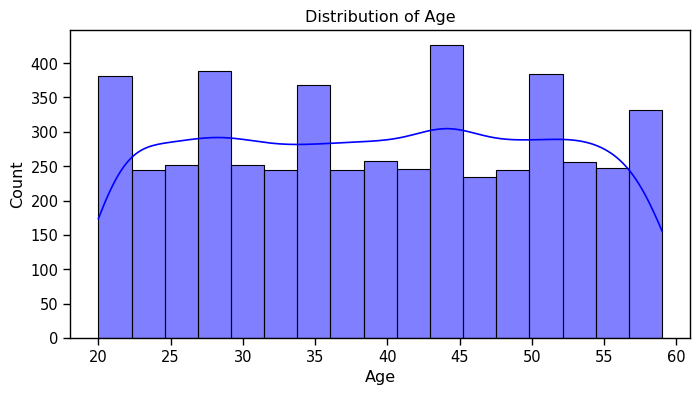

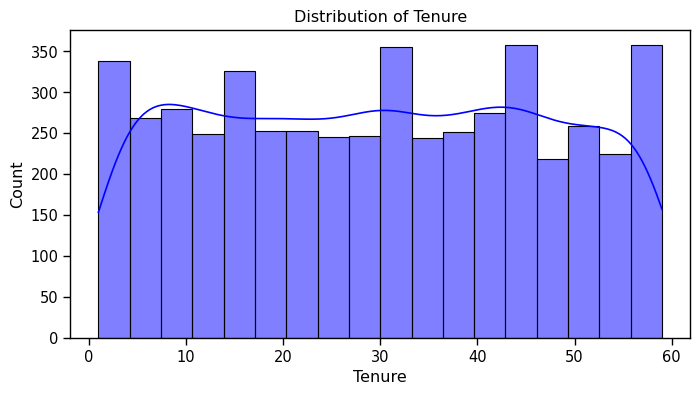

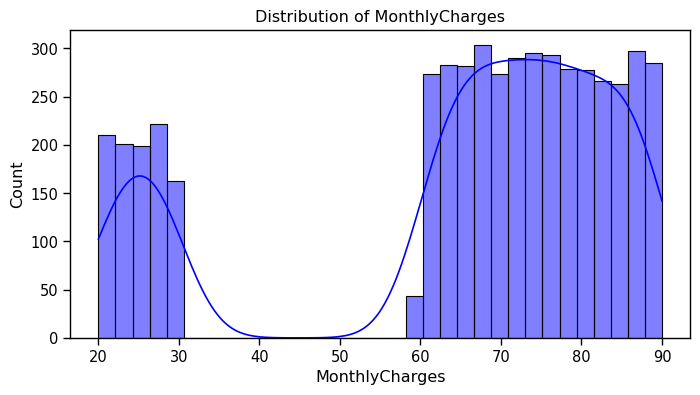

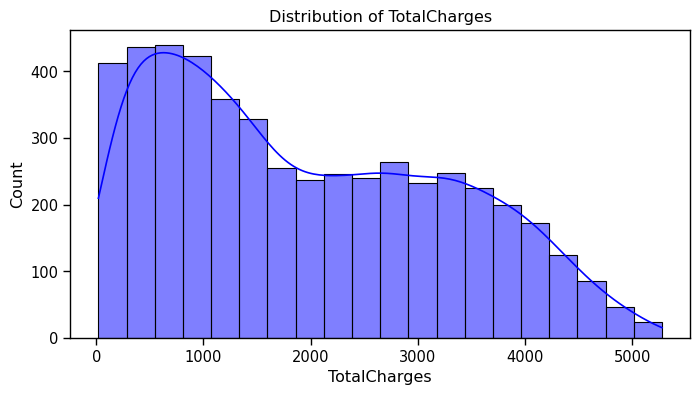

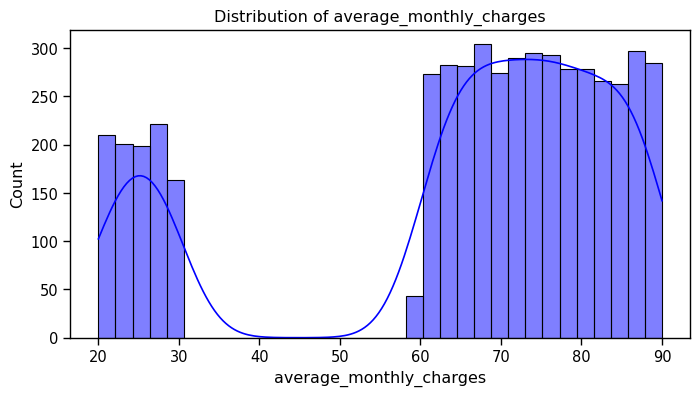

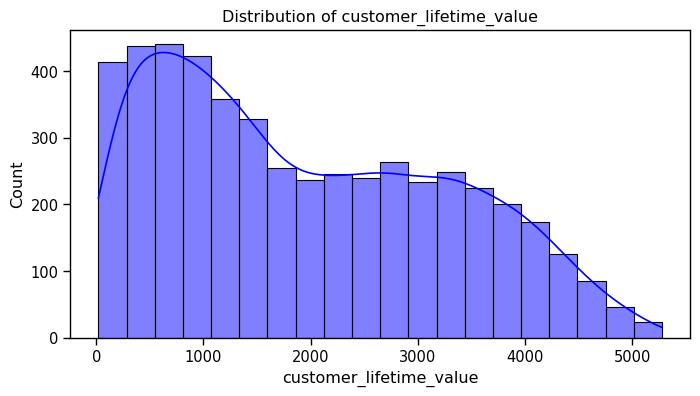

In [31]:
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()

In [32]:
#DATA PREPROCESSING

In [33]:
for i in range(len(data)):
    if data['Churn'][i] == "Yes":
        data['Churn'][i] = 1
    else:
        data['Churn'][i]=0

In [34]:
data=data.drop('CustomerID',axis=1)
x=data.drop('Churn',axis=1)
y=data.Churn

In [35]:
num_features=x.select_dtypes(exclude=object).columns
categorical_features=x.select_dtypes(include=object).columns
num_tr=StandardScaler()
cat_tr=OneHotEncoder()
preprocess=ColumnTransformer([('StandardScaler',num_tr,num_features),
                              ('OneHotEncoder',cat_tr,categorical_features),])

In [36]:
preprocess

ColumnTransformer(transformers=[('StandardScaler', StandardScaler(),
                                 Index(['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges',
       'average_monthly_charges', 'customer_lifetime_value'],
      dtype='object')),
                                ('OneHotEncoder', OneHotEncoder(),
                                 Index(['Gender', 'ContractType', 'InternetService', 'TechSupport',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

In [37]:
x.columns

Index(['Age', 'Gender', 'ContractType', 'InternetService', 'TechSupport',
       'Tenure', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'average_monthly_charges', 'customer_lifetime_value'],
      dtype='object')

In [38]:
x=preprocess.fit_transform(x)

In [39]:
x.shape

(5000, 23)

In [40]:
x

array([[-0.90577725,  0.59478126,  1.02941827, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.75341134, -1.69329027,  0.99087806, ...,  0.        ,
         0.        ,  0.        ],
       [-1.16775439,  1.29880327, -1.99694186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.46914867,  0.65344976, -1.82106644, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57875991,  1.65081427,  0.19823025, ...,  0.        ,
         1.        ,  0.        ],
       [-1.51705725,  1.06412926,  0.97846229, ...,  0.        ,
         0.        ,  0.        ]])

In [41]:
y

0       1
1       1
2       1
3       1
4       0
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: Churn, Length: 5000, dtype: object

In [42]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42, stratify=y)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [43]:
x_train,y_train

(array([[-1.34240582,  0.47744426,  0.55548659, ...,  1.        ,
          0.        ,  0.        ],
        [-0.90577725,  1.35747177, -1.9792938 , ...,  0.        ,
          0.        ,  1.        ],
        [ 1.7139942 ,  0.00809625, -0.01374067, ...,  1.        ,
          0.        ,  0.        ],
        ...,
        [ 0.57875991, -0.28524625, -0.21774637, ...,  0.        ,
          0.        ,  1.        ],
        [-0.6438001 , -0.10924075, -2.09408965, ...,  0.        ,
          0.        ,  0.        ],
        [-1.42973153,  0.47744426,  1.11976197, ...,  0.        ,
          0.        ,  0.        ]]),
 67      1
 3062    1
 1263    1
 4594    1
 155     1
        ..
 4288    0
 4688    1
 1160    1
 440     1
 3072    1
 Name: Churn, Length: 3000, dtype: object)

In [44]:
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GaussianNB": GaussianNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVC": SVC(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoostClassifier": CatBoostClassifier(verbose=0)
}

In [45]:
def evaluate(true,predicted):
    score=accuracy_score(true,predicted)
    mse=mean_squared_error(true,predicted)
    mae=mean_absolute_error(true,predicted)
    mase=np.sqrt(mae) 
    precision = precision_score(y_test, y_pred, average='weighted') * 100
    recall = recall_score(y_test, y_pred, average='weighted') * 100
    f1 = f1_score(y_test, y_pred, average='weighted') * 100
    return mse,mae,mase,score,precision,recall,f1

In [46]:
mod=[]
final_accuracy=0
final_model=""
for i in range(len(models.keys())):
    model=list(models.values())[i]
    y = np.array([i for i in y_train])
    y1 = np.array([i for i in y_test])
    model.fit(x_train,y)
    y_pred=model.predict(x_test)
    mse,mae,mase,score=evaluate(y1,y_pred)
    mod.append(evaluate(y1,y_pred))
    print(model)
    print('mean_squared_error',mse)
    print('mean_absolute_error',mae)
    print('mean_absolute_square_error',mase)
    print('accuracy_score',score)
    print('precision',precision)
    print('recall_score',recall_score)
    print('f1_score',f1_score)
    print('*'*35)
    if final_accuracy < score:
        final_accuracy=score
        final_model=model
print(f"final model is {final_model} with highest accuracy {final_accuracy}".format(final_accuracy,final_model))

LogisticRegression()
mean_squared_error 0.194
mean_absolute_error 0.194
mean_absolute_square_error 0.4404543109109048
accuracy_score 0.806
***********************************
DecisionTreeClassifier()
mean_squared_error 0.305
mean_absolute_error 0.305
mean_absolute_square_error 0.552268050859363
accuracy_score 0.695
***********************************
RandomForestClassifier()
mean_squared_error 0.202
mean_absolute_error 0.202
mean_absolute_square_error 0.44944410108488464
accuracy_score 0.798
***********************************
GaussianNB()
mean_squared_error 0.194
mean_absolute_error 0.194
mean_absolute_square_error 0.4404543109109048
accuracy_score 0.806
***********************************
KNeighborsClassifier()
mean_squared_error 0.225
mean_absolute_error 0.225
mean_absolute_square_error 0.4743416490252569
accuracy_score 0.775
***********************************
SVC()
mean_squared_error 0.194
mean_absolute_error 0.194
mean_absolute_square_error 0.4404543109109048
accuracy_score 0.806

In [47]:
preprocess

ColumnTransformer(transformers=[('StandardScaler', StandardScaler(),
                                 Index(['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges',
       'average_monthly_charges', 'customer_lifetime_value'],
      dtype='object')),
                                ('OneHotEncoder', OneHotEncoder(),
                                 Index(['Gender', 'ContractType', 'InternetService', 'TechSupport',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

In [57]:
#Deployment check

In [58]:
data.columns

Index(['Age', 'Gender', 'ContractType', 'InternetService', 'TechSupport',
       'Tenure', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'average_monthly_charges',
       'customer_lifetime_value'],
      dtype='object')

In [59]:
d=pd.DataFrame({'Age':[35],'Gender':['F'],'ContractType':['Month-to-month'],'InternetService':['Fiber optic'],'TechSupport':['Yes'],"Tenure":[14],'PaperlessBilling':['Yes'],'PaymentMethod':['Mail check'],
              'MonthlyCharges':[63],'TotalCharges':[4433],'average_monthly_charges':[234],'customer_lifetime_value':[234]
})

In [60]:
d

Age Gender    ContractType InternetService TechSupport  Tenure  \
0   35      F  Month-to-month     Fiber optic         Yes      14   

  PaperlessBilling PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes    Mail check              63          4433   

   average_monthly_charges  customer_lifetime_value  
0                      234                      234

In [61]:
m=preprocess.transform(d)

In [62]:
model.predict(m)

array([1], dtype=int64)

In [68]:
import pickle
with open("Think_model.pkl","wb") as file:
  pickle.dump(final_model,file)
print("The model has been saved")

The model has been saved


In [ ]:
import pickle
with open("model.pkl","wb") as file:
  pickle.dump(best_model,file)
print("The model has been saved")